<a href="https://colab.research.google.com/github/hadwin-357/ML_models/blob/main/SupportVecotrMachine_kernel_hyperparameter_feature_select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Support Vector Machine**
1. linear model costom implementation through Gradient Descent
2. using sklearn (kernelized, linear, poly, rbf)
3. testing hyperparameter optimization
4. show case feature selection

[SVM thory_Cornell_online_course](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote14.html)


Loss function:  Hinge loss + regularization



In [2]:
# Part I, from scratch

import numpy as np

class SVM():
  def __init__(self, lr=0.01, lambda_param=0.01, n_iters=500): # lambda_params: larger, more regularization
    self.lr = lr
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.weight= None # initalize after knowing feature dimension
    self.bias = 0

  def training(self, X, y):
    ''' fitting the wight and bias without gradient descent
    Args:
    X: n sample with d dimension features
    y: label (1, or -1)
    at hyperplane: W.t*X-b =0;
    at supporting vector: W.t*X-b = 1, or -1
    when misclassifized, y(W.t*X-b) <1, derive gradient on both loss_fun and regularization
    others time, only regularization

    return: self.weight, self.bias
    '''
    n_samples, n_features = X.shape
    #make sure y is either 1 or -1
    y_ = np.where (y<=0, -1, 1)
    # initialize weight with zero
    self.weight =np.zeros(n_features)
    # loop through data to do minimization by n_iters
    for _ in range(self.n_iters):
      #check condition
      for idx, x_i in enumerate(X):
        condition = y_[idx]*(np.dot(x_i, self.weight)-self.bias)>=1
        if condition: # right classification
          self.weight -=self.lr*(2*self.lambda_param*self.weight )
        else:
          self.weight-= self.lr*(2*self.lambda_param*self.weight-np.dot(x_i,y_[idx]))
          self.bias -= self.lr*y_[idx]
    return self.weight, self.bias

  def predict(self, X):
    pred = np.dot(X, self.weight)-self.bias   # <0 -1, >0 +1
    return np.sign(pred)


In [3]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time : {total_time:.3f} seconds")
    return total_time

In [4]:
# train and test using sklearn datasets
from sklearn import datasets
cancer = datasets.load_breast_cancer()
#knowing the data
print(f"{cancer['data'].shape[0]} of data with {cancer['data'].shape[1]} features")
print('lable:',cancer.target_names)



569 of data with 30 features
lable: ['malignant' 'benign']


In [5]:
cancer['target'][:5]

array([0, 0, 0, 0, 0])

In [6]:
# convert label(0, 1) to (-1, 1)

y= np.where(cancer['target']==0, -1, 1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(
        cancer['data'], y, test_size=0.2, random_state=42
    )
start_time=timer()
model_0 = SVM()
model_0.training(X_train, y_train)
pred =model_0.predict(X_test)
end_time =timer()

print(f'accuracy score: {accuracy_score(y_test, pred)}')
print(f"confusion matrix:{confusion_matrix(y_test,pred)}")
print_train_time(start_time, end_time)


accuracy score: 0.9473684210526315
confusion matrix:[[37  6]
 [ 0 71]]
Train time : 2.751 seconds


2.7507061559999926

In [7]:
# use sklearn package
from sklearn import svm
#create model
start_time=timer()
model_1 = svm.SVC(kernel='linear')
model_1.fit(X_train, y_train)
y_pred =model_1.predict(X_test)
end_time=timer()

print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f"confusion matrix:{confusion_matrix(y_test,y_pred)}")
print_train_time(start_time,end_time)

accuracy score: 0.956140350877193
confusion matrix:[[39  4]
 [ 1 70]]
Train time : 2.554 seconds


2.5535501600000003

In [10]:
#grid search hyperparameter C
from sklearn.model_selection import GridSearchCV
param_grids = [{'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(model_1, param_grids, cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001]}])

In [11]:
grid.best_score_, grid.best_params_

(0.9603864734299516, {'C': 15})

In [12]:
start_time=timer()
model_1 = svm.SVC(kernel='linear', C =15)
model_1.fit(X_train, y_train)
y_pred =model_1.predict(X_test)
end_time=timer()

print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f"confusion matrix:{confusion_matrix(y_test,y_pred)}")
print_train_time(start_time,end_time)

accuracy score: 0.956140350877193
confusion matrix:[[39  4]
 [ 1 70]]
Train time : 10.627 seconds


10.627241339999955

In [14]:
# 'rbf kernel'
from sklearn import svm
#hyperparameter: C, penalty for misclassifed data point, gamma:0.0001-10 the more, more prone to overfitting
#create model
start_time =timer()
model_2 = svm.SVC(kernel='rbf', C=10, gamma='auto')  #
model_2.fit(X_train, y_train)
y_pred =model_2.predict(X_test)
end_time =timer()
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'train accuracy score: {accuracy_score(y_train, model_2.predict(X_train))}')
print(f"confusion matrix:{confusion_matrix(y_test,y_pred)}")
print_train_time(start_time, end_time)

accuracy score: 0.6228070175438597
train accuracy score: 1.0
confusion matrix:[[ 0 43]
 [ 0 71]]
Train time : 0.028 seconds


0.027636909999955606

In [15]:
from sklearn.model_selection import GridSearchCV
param_grids = [{'C': [15,14,13,12,11,10,1,0.1,0.001],'gamma':[0.0001, 0.001,0.1, 1]}]
grid = GridSearchCV(model_2, param_grids, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=10, gamma='auto'),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'gamma': [0.0001, 0.001, 0.1, 1]}])

In [16]:
grid.best_score_, grid.best_params_

(0.9538461538461538, {'C': 15, 'gamma': 0.0001})

In [17]:
start_time =timer()
model_2 = svm.SVC(kernel='rbf', C=15, gamma=0.0001)  #
model_2.fit(X_train, y_train)
y_pred =model_2.predict(X_test)
end_time =timer()
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'train accuracy score: {accuracy_score(y_train, model_2.predict(X_train))}')
print(f"confusion matrix:{confusion_matrix(y_test,y_pred)}")
print_train_time(start_time, end_time)

accuracy score: 0.9473684210526315
train accuracy score: 0.978021978021978
confusion matrix:[[40  3]
 [ 3 68]]
Train time : 0.024 seconds


0.023895140000149695

In [27]:
# poly kernel
from sklearn import svm
#create model
start_time =timer()
model_3 = svm.SVC(kernel='poly', C=5, degree=3)  #
model_3.fit(X_train, y_train)
y_pred =model_3.predict(X_test)
end_time =timer()
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'train accuracy score: {accuracy_score(y_train, model_3.predict(X_train))}')
print(f"confusion matrix:{confusion_matrix(y_test,y_pred)}")
print_train_time(start_time, end_time)

accuracy score: 0.9473684210526315
train accuracy score: 0.9164835164835164
confusion matrix:[[37  6]
 [ 0 71]]
Train time : 0.009 seconds


0.008996990000014193

In [21]:
from sklearn.model_selection import GridSearchCV
param_grids = [{'C': [15,14,13,12,11,10,1,0.1,0.001],'degree':[1, 2, 3, 4, 5, 6, 7]}]
grid = GridSearchCV(model_3, param_grids, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=5, degree=4, kernel='poly'),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'degree': [1, 2, 3, 4, 5, 6, 7]}])

In [22]:
grid.best_score_, grid.best_params_

(0.9186813186813187, {'C': 15, 'degree': 4})

In [28]:
start_time =timer()
model_3 = svm.SVC(kernel='poly', C=15, degree=4)  #
model_3.fit(X_train, y_train)
y_pred =model_3.predict(X_test)
end_time =timer()
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'train accuracy score: {accuracy_score(y_train, model_3.predict(X_train))}')
print(f"confusion matrix:{confusion_matrix(y_test,y_pred)}")
print_train_time(start_time, end_time)

accuracy score: 0.9298245614035088
train accuracy score: 0.9164835164835164
confusion matrix:[[35  8]
 [ 0 71]]
Train time : 0.014 seconds


0.013587826000048153

<BarContainer object of 30 artists>

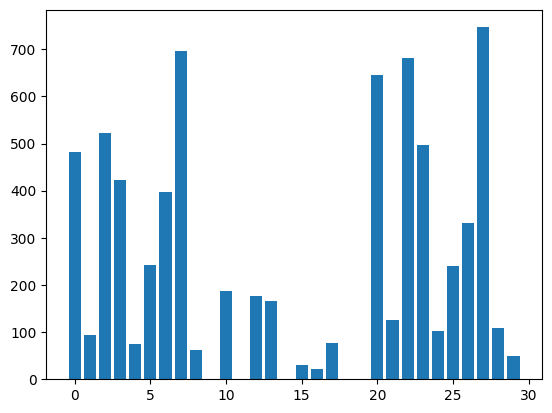

In [35]:
# feature selection
# methods: https://machinelearningmastery.com/feature-selection-machine-learning-python/
# here we implement the selectKBest method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

In [36]:
# choose the top 10 feature
fs = SelectKBest(score_func=f_classif, k=10)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [37]:
X_train_fs.shape

(455, 10)

In [38]:
#make prediction after feature selected data
start_time =timer()
model_3 = svm.SVC(kernel='poly', C=15, degree=4)  #
model_3.fit(X_train_fs, y_train)
y_pred =model_3.predict(X_test_fs)
end_time =timer()
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'train accuracy score: {accuracy_score(y_train, model_3.predict(X_train_fs))}')
print(f"confusion matrix:{confusion_matrix(y_test,y_pred)}")
print_train_time(start_time, end_time)

accuracy score: 0.9298245614035088
train accuracy score: 0.9164835164835164
confusion matrix:[[35  8]
 [ 0 71]]
Train time : 0.009 seconds


0.008827296000163187

In [43]:
# if we under selelct the feature (like only 4), see what's going on
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k=2)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [44]:
X_train_fs.shape

(455, 2)

In [45]:
start_time =timer()
model_4 = svm.SVC(kernel='poly', C=15, degree=4)  #
model_4.fit(X_train_fs, y_train)
y_pred =model_4.predict(X_test_fs)
end_time =timer()
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'train accuracy score: {accuracy_score(y_train, model_4.predict(X_train_fs))}')
print(f"confusion matrix:{confusion_matrix(y_test,y_pred)}")
print_train_time(start_time, end_time)

accuracy score: 0.9385964912280702
train accuracy score: 0.9230769230769231
confusion matrix:[[36  7]
 [ 0 71]]
Train time : 0.025 seconds


0.025108032999924035

#Conclusion
1. custom implement of linear SVM
2. sklearn implement of liearn poly and rbf kernelized SVM
3. use grid search for hyperparameters (learn to use Guassian process later)
4. model performance is  sentitive to hyperparametesr (regularization, overfitting)
5. use fetaure selection to preprocess data  to reduce computation time, remove noise data
6. suprisingly, in this case, only 2 features is enough to make good prediction; more features doesn't improve accuracy.


